In [1]:
import pandas as pd
import nltk as nltk
from selectolax.parser import HTMLParser
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_tc = pd.read_excel('data\datos.xlsx',sheet_name="TC")
df_uo = pd.read_excel('data\datos.xlsx',sheet_name="UO")
# https://stackoverflow.com/questions/72409440/how-to-combine-two-seaborn-catplot-s-with-shared-x-axis

In [49]:
df_tc_t = df_tc.T.reset_index()
df_tc_t = df_tc_t.drop([0,1,2,3,],axis=0)
df_tc_t = df_tc_t.rename(columns={'index':'Fecha',0:'VP Empresas Region 1-VP Empresas zona 1',1:'VP Empresas Region 1-VP Empresas zona 2',2:'VP Empresas Region 1-VP Empresas zona 3',
                        3:'VP Empresas Region 2-VP Empresas zona 4',4:'VP Empresas Region 2-VP Empresas zona 5',5:'VP Empresas Region 2-VP Empresas zona 6',
                        6:'VP Empresas Region 3-VP Empresas zona 7',7:'VP Empresas Region 3-VP Empresas zona 8'})
df_tc_t = df_tc_t.melt(id_vars='Fecha', var_name='VP Empresas')
df_tc_t['TIPO'] = 'TC'
df_tc_t.head(3)

,Fecha,VP Empresas,value,TIPO
0,Feb - 2020,VP Empresas Region 1-VP Empresas zona 1,1942243.20,TC
1,Mar - 2020,VP Empresas Region 1-VP Empresas zona 1,2069713.72,TC
2,Abr - 2020,VP Empresas Region 1-VP Empresas zona 1,2241498.53,TC


In [50]:
df_uo_t = df_uo.T.reset_index()
df_uo_t = df_uo_t.drop([0,1,2,3,],axis=0)

df_uo_t = df_uo_t.rename(columns={'index':'Fecha',0:'VP Empresas Region 1-VP Empresas zona 1',1:'VP Empresas Region 1-VP Empresas zona 2',2:'VP Empresas Region 1-VP Empresas zona 3',
                        3:'VP Empresas Region 2-VP Empresas zona 4',4:'VP Empresas Region 2-VP Empresas zona 5',5:'VP Empresas Region 2-VP Empresas zona 6',
                        6:'VP Empresas Region 3-VP Empresas zona 7',7:'VP Empresas Region 3-VP Empresas zona 8'})
df_uo_t = df_uo_t.melt(id_vars='Fecha', var_name='VP Empresas')
df_uo_t['TIPO'] = 'UO'
df_uo_t.head(3)

,Fecha,VP Empresas,value,TIPO
0,Feb - 2020,VP Empresas Region 1-VP Empresas zona 1,8140.86,UO
1,Mar - 2020,VP Empresas Region 1-VP Empresas zona 1,8234.70,UO
2,Abr - 2020,VP Empresas Region 1-VP Empresas zona 1,8687.51,UO


In [73]:
df_final = pd.concat([df_tc_t,df_uo_t],axis=1)
df_final

,Fecha,VP Empresas,value,TIPO,Fecha,VP Empresas,value,TIPO
0,Feb - 2020,VP Empresas Region 1-VP Empresas zona 1,1942243.20,TC,Feb - 2020,VP Empresas Region 1-VP Empresas zona 1,8140.86,UO
1,Mar - 2020,VP Empresas Region 1-VP Empresas zona 1,2069713.72,TC,Mar - 2020,VP Empresas Region 1-VP Empresas zona 1,8234.70,UO
2,Abr - 2020,VP Empresas Region 1-VP Empresas zona 1,2241498.53,TC,Abr - 2020,VP Empresas Region 1-VP Empresas zona 1,8687.51,UO
3,May - 2020,VP Empresas Region 1-VP Empresas zona 1,2308574.98,TC,May - 2020,VP Empresas Region 1-VP Empresas zona 1,9251.17,UO
4,Jun - 2020,VP Empresas Region 1-VP Empresas zona 1,2328187.37,TC,Jun - 2020,VP Empresas Region 1-VP Empresas zona 1,8760.35,UO
...,...,...,...,...,...,...,...,...
203,Nov - 2021,VP Empresas Region 3-VP Empresas zona 8,2464547.95,TC,Nov - 2021,VP Empresas Region 3-VP Empresas zona 8,7924.79,UO
204,Dic - 2021,VP Empresas Region 3-VP Empresas zona 8,2500880.79,TC,Dic - 2021,VP Empresas Region 3-VP Empresas zona 8,9113.99,UO
205,Ene - 2022,VP Empresas Region 3-VP Empresas zona 8,2508292.83,TC,Ene - 2022,VP Empresas Region 3-VP Empresas zona 8,9057.58,UO
206,Feb - 2022,VP Empresas Region 3-VP Empresas zona 8,2495070.94,TC,Feb - 2022,VP Empresas Region 3-VP Empresas zona 8,8743.33,UO


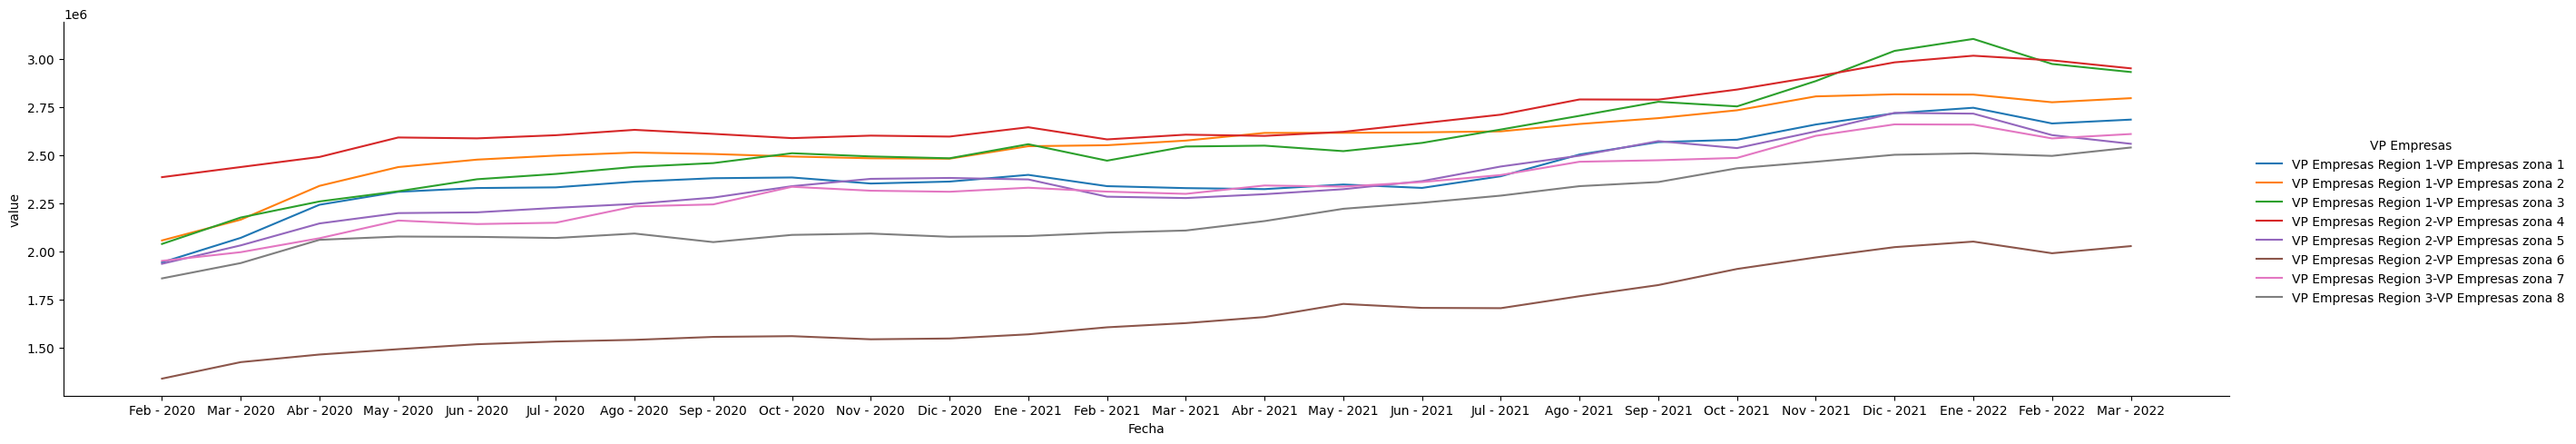

In [93]:
sns.relplot(x = "Fecha", y = "value", data = df_tc_t, hue="VP Empresas",kind='line',  aspect=50/10)

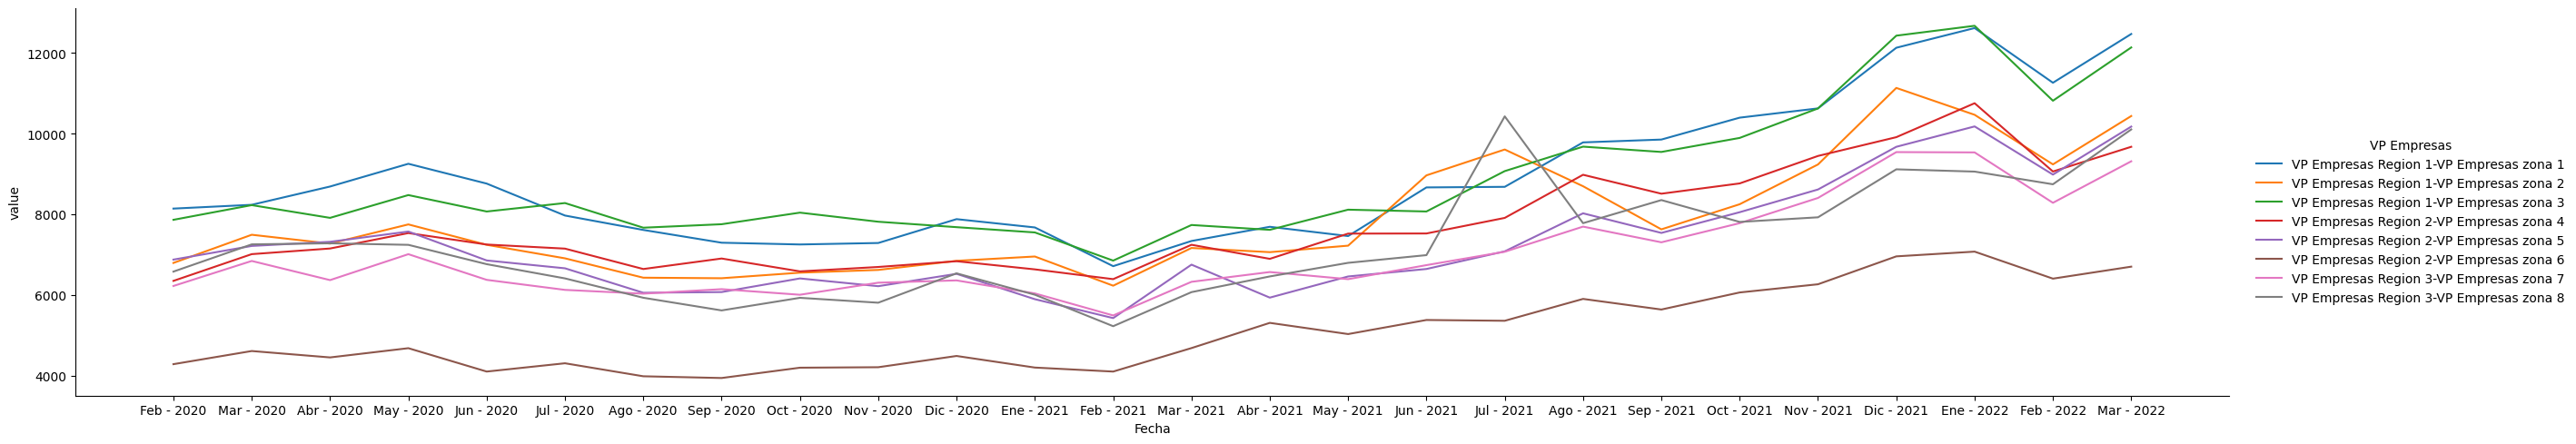

In [92]:
sns.relplot(x = "Fecha", y = "value", data = df_uo_t, hue="VP Empresas",kind='line',  aspect=50/10)

In [9]:
df_final.to_csv('data\datos_transformados.csv' ,index=False)